In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

import sys
sys.path.append("..\\Source")

import numpy as np
from Environments.CleanBotEnv import CleanBotEnv
from Models.TableModel import TableModel
from Methods.MonteCarloMethods import AveragingMC
from Methods.Policies import EpsilonGreedyPolicy
from Utilities.Eval import StatsLogger, ScrollingPlot


In [4]:
np.random.seed(643674)
env = CleanBotEnv(3)
model = TableModel(env)
policy = EpsilonGreedyPolicy(model, 0.1)
mc = AveragingMC(env, model, policy)
stats = StatsLogger(mc.stats, max_length=2000)

figures = [
    {
        "plots": [
           {
               "stat" : "first_time_visited",
               "color": "b"
           }, {
               "stat" : "fifth_time_visited",
               "color": "g"
           }
        ]
    },
    {
        "plots": [
           {
               "stat" : "max_action_value_delta",
               "color": "b"
           }
        ]
    }
]



<IPython.core.display.Javascript object>


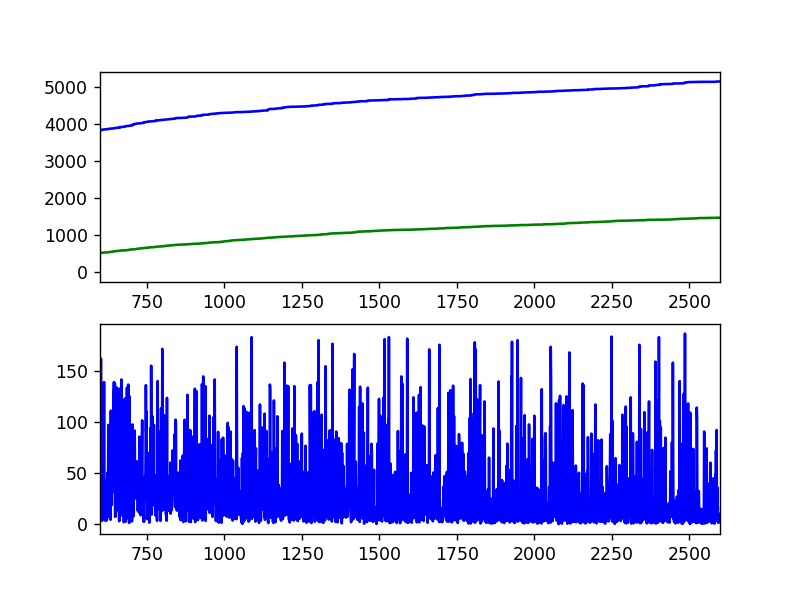

In [5]:
plotHelper = ScrollingPlot(figures)

In [6]:
try:
    policy.exploration = 0.1
    env.max_steps = 100
    episode_count = 500000
    for i in range(episode_count):
        mc.run_episode()
        stats.append(mc.stats)
        if i % 500 == 99:
            plotHelper.update_plot(stats)
except KeyboardInterrupt:
    print("Keyborad interrupt")

Keyborad interrupt
